# EDA and research analysis

## Получение данных

Импортируем необходимые библиотеки и читаем файл с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Описание полей:
1. PassengerId - идентификатор пассажира;
2. Survived - признак выживания (0 для умерших, 1 для выживших);
3. Pclass - класс пассажира (1 - высший, 2 - средний, 3 - низший);
4. Name - имя пассажира;
5. Sex - пол пассажира;
6. Age - возраст пассажира;
7. SibSp - количество братьев, сестер, сводных братьев и сестер и супругов пассажира на борту;
8. Parch - количество родителей и детей (в том числе и приемных) пассажира на борту;
9. Ticket - номер билета пассажира;
10. Fare - стоимость билета пассажира;
11. Cabin - каюта пассажира;
12. Embarked - порт посадки пассажира (C - Шербур, S - Саутгемптон, Q - Квинстаун);  

## Составление гипотез

### Класс пассажира

#### 1. Пассажиры первого класса выживали чаще

Пассажиры первого класса имеют высокий показатель социально-экономического статуса, а поэтому предположим, что они имеют наивысшую ценность для капитана и, следовательно, их выживание было важнее   

Выжившие пассажиры 1 класса: 62.96%
Выжившие пассажиры всего: 38.38%


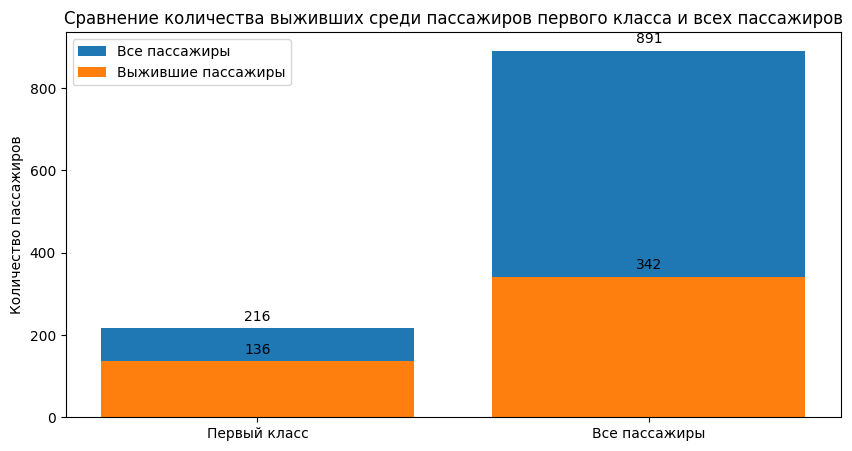

In [2]:
all_first_class = df.loc[df['Pclass'] == 1].shape[0]
survived_first_class = df.loc[df['Pclass'] == 1].loc[df['Survived'] == 1].shape[0]
all_survived = df.loc[df['Survived'] == 1].shape[0]

print(f'Выжившие пассажиры 1 класса: {survived_first_class/all_first_class*100:.2f}%')
print(f'Выжившие пассажиры всего: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Первый класс', 'Все пассажиры'), (all_first_class, len(df)), label='Все пассажиры')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Первый класс', 'Все пассажиры'), (survived_first_class, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение количества выживших среди пассажиров первого класса и всех пассажиров')
ax.set_xticks(range(2))
ax.set_xticklabels(('Первый класс', 'Все пассажиры'))
ax.legend()
plt.show()

Гипотеза подтвердилась – пассажиры первого класса выживали чаще.

#### 2. Пассажиры третьего класса выживали реже

В свою очередь, пассажиры третьего класса имеют низкий социально-экономический статус, следовательно, могут не иметь столь же ценности как пассажиры первого класса. 

Выжившие пассажиры 3 класса: 24.24%
Выжившие пассажиры всего: 38.38%


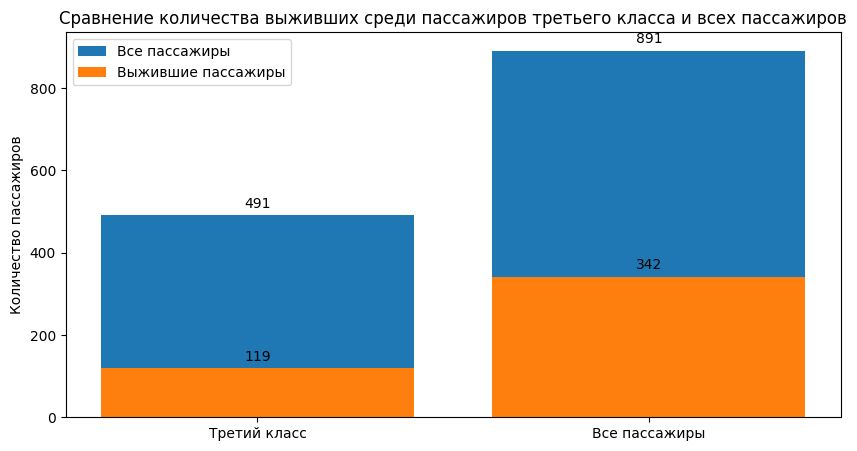

In [3]:
all_third_class = df.loc[df['Pclass'] == 3].shape[0]
survived_third_class = df.loc[df['Pclass'] == 3].loc[df['Survived'] == 1].shape[0]

print(f'Выжившие пассажиры 3 класса: {survived_third_class/all_third_class*100:.2f}%') 
print(f'Выжившие пассажиры всего: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Третий класс', 'Все пассажиры'), (all_third_class, len(df)), label='Все пассажиры')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Третий класс', 'Все пассажиры'), (survived_third_class, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение количества выживших среди пассажиров третьего класса и всех пассажиров')
ax.set_xticks(range(2))
ax.set_xticklabels(('Третий класс', 'Все пассажиры'))
ax.legend()
plt.show()

Гипотеза подтвердилась – пассажиры третьего класса выживали реже

Посчитаем общее количество и количество выживших в зависимости от класса. 

Выжившие пассажиры класса 1: 62.96%
Выжившие пассажиры класса 2: 47.28%
Выжившие пассажиры класса 3: 24.24%


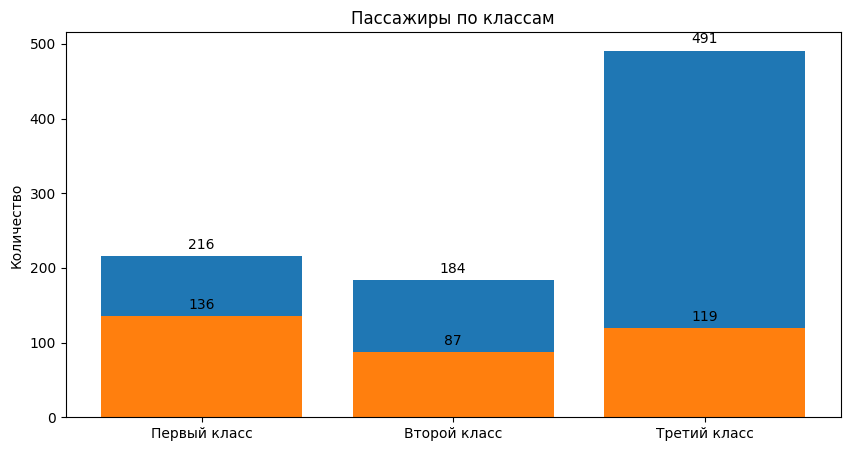

In [4]:
all_second_class = df.loc[df['Pclass'] == 2].shape[0]
survived_second_class = df.loc[df['Pclass'] == 2].loc[df['Survived'] == 1].shape[0]

print(f'Выжившие пассажиры класса 1: {survived_first_class/all_first_class*100:.2f}%')
print(f'Выжившие пассажиры класса 2: {survived_second_class/all_second_class*100:.2f}%')
print(f'Выжившие пассажиры класса 3: {survived_third_class/all_third_class*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(("Первый класс", "Второй класс", "Третий класс"), (all_first_class, all_second_class, all_third_class), label='Всего')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(("Первый класс", "Второй класс", "Третий класс"), (survived_first_class, survived_second_class, survived_third_class), label='Выжившие')
ax.bar_label(survived_bar, padding=3)
ax.set_title('Пассажиры по классам')
ax.set_ylabel('Количество')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Первый класс', 'Второй класс', 'Третий класс'])
plt.show()


### Имя пассажира

Имена пассажиров содержат их статус – мистер, миссис, мастер и другие. Поэтому есть смысл проверить и это поле. Для начала стоит выяснить какие статусы в принципе могут фигурировать в именах.

In [5]:
df['Name'].str.extract(', ([a-zA-Z ]+)').value_counts()

0           
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Lady              1
Don               1
Jonkheer          1
Mme               1
Ms                1
Sir               1
the Countess      1
Name: count, dtype: int64

Видим, что в целом тут 17 статусов. Поместим их в отдельный список и разгруппируем по категориям: обычный и формальный статусы.

In [6]:
statuses = [tpl[0] for tpl in df['Name'].str.extract(', ([a-zA-Z ]+)').value_counts().index.to_list()]
statuses

['Mr',
 'Miss',
 'Mrs',
 'Master',
 'Dr',
 'Rev',
 'Mlle',
 'Major',
 'Col',
 'Capt',
 'Lady',
 'Don',
 'Jonkheer',
 'Mme',
 'Ms',
 'Sir',
 'the Countess']

Среди них обычные статусы это: Mr, Miss, Mrs, Mlle, Ms, Mme.
Остальные будут в формальных, но стоит проверить 2 статуса среди них: Master и Col, так как они могут применяться как обычное так и формальное обращение.
Поэтому проанализируем данные из датасета с такими статусами. 

In [7]:
df.loc[df['Name'].str.contains('Master')].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


Видим, что Master в данном случае обозначает мальчика, можно его внести в список обычных статусов. 
Проверим Col.

In [8]:
df.loc[df['Name'].str.contains('Col. ')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.50,A26,C
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.55,NaN,S


Особо ничего не выяснили, кроме того, что это старые мужчины. Проверим всех старых мужчин и посмотрим, какой статус определен у них.

In [9]:
df.loc[df['Age'] >= 56].loc[df['Sex'] == 'male']['Name'].str.extract(', ([a-zA-Z]+)').value_counts()

0   
Mr      26
Col      2
Capt     1
Rev      1
Name: count, dtype: int64

Подавляющее большинство имеет статус "мистер". Поэтому предположим, что col – это формальный статус.

In [10]:
common_statuses = ['Mr', 'Miss', 'Mrs', 'Mlle', 'Ms', 'Mme', 'Master']
formal_statuses = [i for i in statuses if i not in common_statuses]


Все готово, значит можно приступать к гипотезам.

#### 1. Люди с формальным статусом выживали чаще.

Да, звучит нелепо, их самих очень мало по сравнению с обычными людьми, но это имеет место быть – статус многое значил в те времена.

Выжившие пассажиры с формальными статусами: 31.82%
Выжившие пассажиры всего: 38.38%


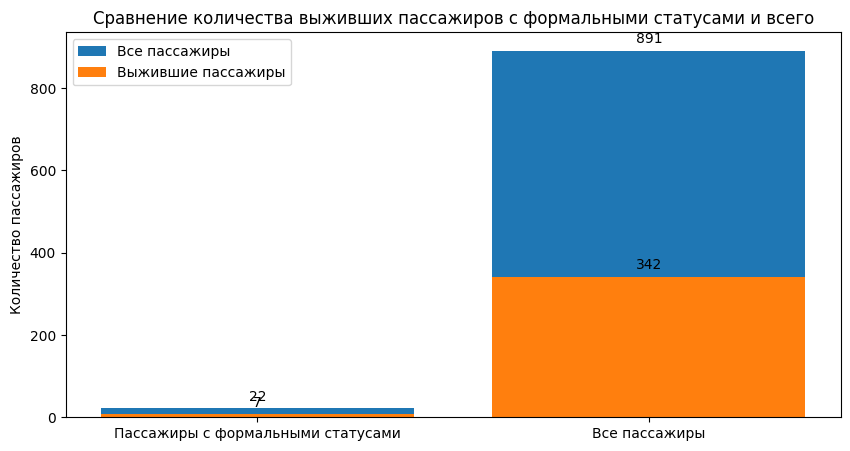

In [11]:
extracted_statuses = df['Name'].str.extract(', ([a-zA-Z]+)', expand=False) 
all_formal_statuses = df.loc[extracted_statuses.isin(formal_statuses)].shape[0]
survived_formal_statuses = df.loc[extracted_statuses.isin(formal_statuses)].loc[df['Survived'] == 1].shape[0]

print(f'Выжившие пассажиры с формальными статусами: {survived_formal_statuses/all_formal_statuses*100:.2f}%')
print(f'Выжившие пассажиры всего: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Пассажиры с формальными статусами', 'Все пассажиры'), (all_formal_statuses, len(df)), label='Все пассажиры')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Пассажиры с формальными статусами', 'Все пассажиры'), (survived_formal_statuses, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение количества выживших пассажиров с формальными статусами и всего')
ax.set_xticks(range(2))
ax.set_xticklabels(('Пассажиры с формальными статусами', 'Все пассажиры'))
ax.legend()
plt.show()

Гипотеза опровергнута – можно увидеть, что даже если этих пассажиров очень мало, выжило их еще меньше.

Подсчитаем общее количество и количество выживших в зависимости от их статуса.

Выжившие пассажиры с обычными статусами: 38.48%
Выжившие пассажиры с формальными статусами: 31.82%


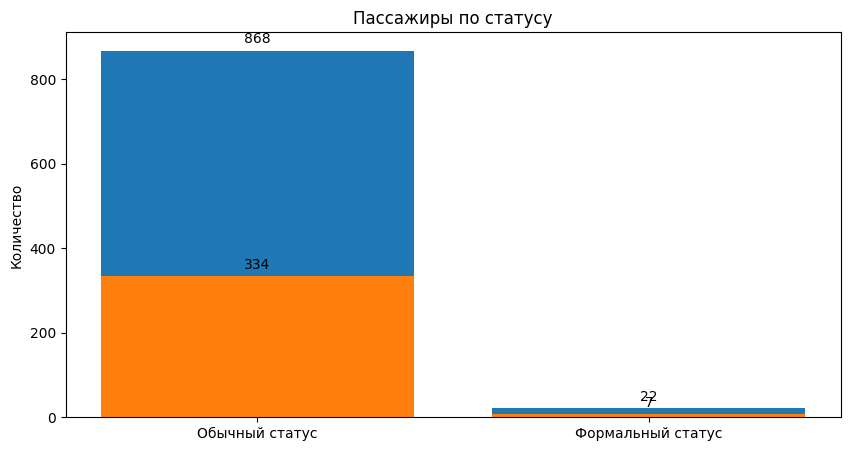

In [12]:
all_common_statuses = df.loc[extracted_statuses.isin(common_statuses)].shape[0]
survived_common_statuses = df.loc[extracted_statuses.isin(common_statuses)].loc[df['Survived'] == 1].shape[0]

print(f'Выжившие пассажиры с обычными статусами: {survived_common_statuses/all_common_statuses*100:.2f}%')
print(f'Выжившие пассажиры с формальными статусами: {survived_formal_statuses/all_formal_statuses*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(("Обычный статус", "Формальный статус"), (all_common_statuses, all_formal_statuses), label='Всего')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(("Обычный статус", "Формальный статус"), (survived_common_statuses, survived_formal_statuses), label='Выжившие')
ax.bar_label(survived_bar, padding=3)
ax.set_title('Пассажиры по статусу')
ax.set_ylabel('Количество')
ax.set_xticks([0, 1])
ax.set_xticklabels(["Обычный статус", "Формальный статус"])
plt.show()

Тут уже можно увидеть, что даже пассажиры с обычными статусами не выживали очень часто. Значит, статусы никак не влияют на то, выживет пассажир или нет.

Подойдем с другой стороны – может быть определенный статус выживал чаще остальных. Для этого создадим новую колонку – статус пассажира.

<Axes: >

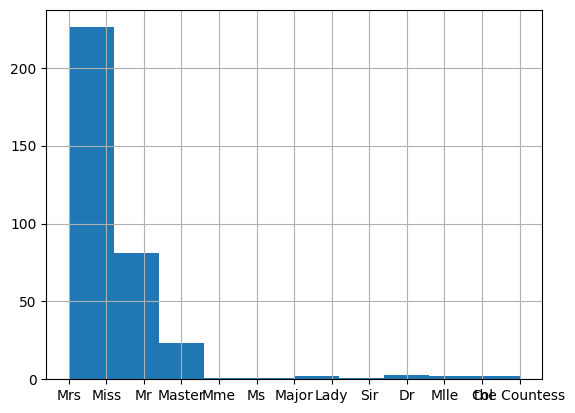

In [13]:
df['Status'] = df['Name'].str.extract(', ([a-zA-Z ]+)', expand=False)
df['Status'].loc[df['Survived'] == 1].hist()

Можно увидеть что выживших пассажиров с определнными статусами больше. Посмотрим на их долю выживаемости в целом.

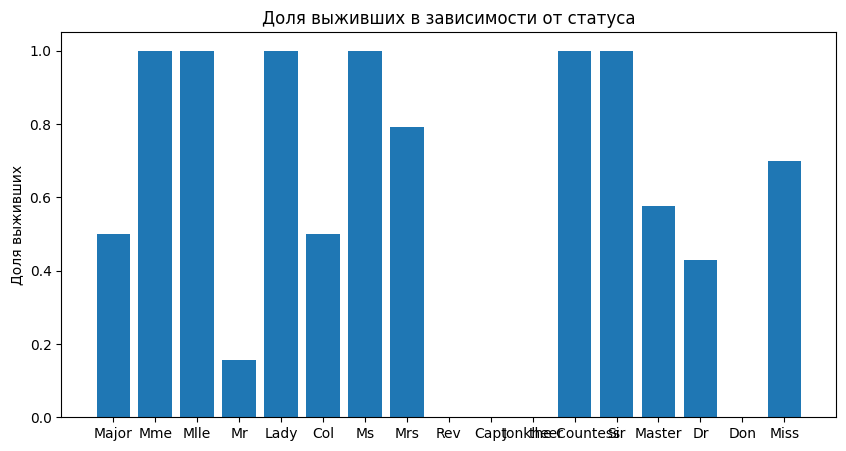

In [14]:
survived_status_percent = dict.fromkeys(set(df['Status']), None)
for status in survived_status_percent.keys():
    survived_status_percent[status] = df.loc[df['Status'] == status].loc[df['Survived'] == 1].shape[0] / df.loc[df['Status'] == status].shape[0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(survived_status_percent.keys(), survived_status_percent.values())
ax.set_ylabel('Доля выживших')
ax.set_title('Доля выживших в зависимости от статуса')
plt.show()

Так тяжело что-либо понять, поэтому формальные статусы будем рассматривать как один статус. Также можно увидеть, что статусы Mlle, Ms, Mme тоже не очень хорошо отражают выживаемость. Объединим их с какими-то из статусов Mrs или Miss. Чтобы это сделать, нужно выяснить в зависимости от чего такой статус. 

In [15]:
df.loc[(df['Status'] == "Mlle") | (df['Status'] == "Ms") | (df['Status'] == "Mme")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,Mme
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,Ms
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle


Можно увидеть, что статус присваивался молодым незамужним девушкам. Теперь проанализируем статусы Mrs и Miss.

In [16]:
df.loc[(df['Status'] == "Mrs") | (df['Status'] == "Miss")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Mrs
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,Miss
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss


Данных слишком много, поэтому сгруппируем по статусу и посмотрим на средние значения возраста и наличия детей или супругов.

In [17]:
df.loc[(df['Status'] == "Mrs") | (df['Status'] == "Miss")].groupby('Status').mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Status,,,,,,,
Miss,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873
Mrs,453.160000,0.792000,2.000000,35.898148,0.696000,0.832000,45.138533


Можно увидеть, что ближе всего к изначально рассматриваемым статусам статус Miss – объединим вместе с ним.

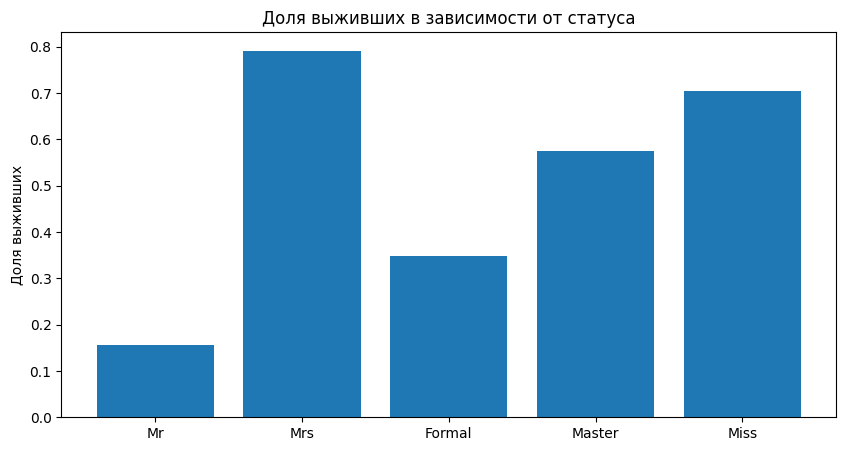

In [18]:
df['Status'] = df['Status'].apply(lambda x: 'Miss' if x in ['Mlle', 'Mme', 'Ms'] else x)
df['Status'] = df['Status'].apply(lambda x: 'Formal' if x in formal_statuses else x)

survived_status_percent = dict.fromkeys(set(df['Status']), None)
for status in survived_status_percent.keys():
    survived_status_percent[status] = df.loc[df['Status'] == status].loc[df['Survived'] == 1].shape[0] / df.loc[df['Status'] == status].shape[0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(survived_status_percent.keys(), survived_status_percent.values())
ax.set_ylabel('Доля выживших')
ax.set_title('Доля выживших в зависимости от статуса')
plt.show()

Можно заметить, что пассажиры со статусами Mrs, Miss и Master выживали гораздо чаще. Примем это к сведению.

### Пол пассажира

#### 1. Женщины выживали чаще

«Сначала женщиины и дети» – исторически неписаное правило, согласно которому задача по спасению жизней женщин и детей имеют наивысший приоритет. Безусловно на Титанике оно тоже было – именно после этой катастрофы эта фраза получила наибольшую известность. 

Выжившие женщины: 74.20%
Выжившие пассажиры всего: 38.38%


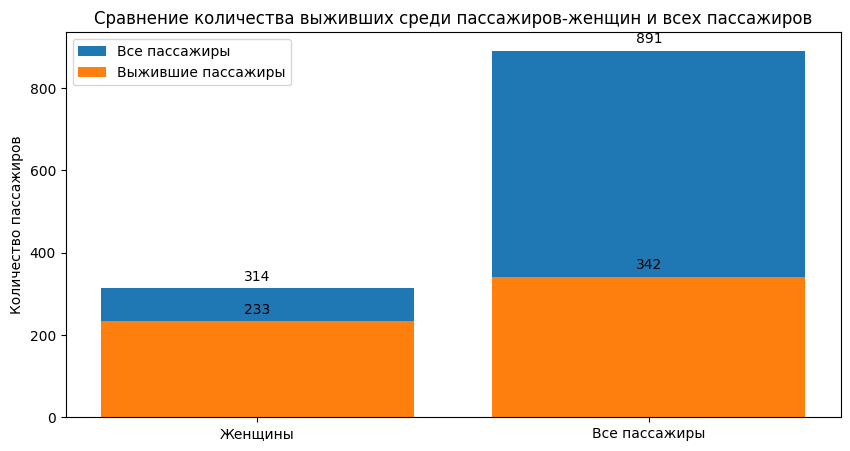

In [19]:
all_females = df.loc[df['Sex'] == 'female'].shape[0]
survived_females = df.loc[df['Sex'] == 'female'].loc[df['Survived'] == 1].shape[0]

print(f'Выжившие женщины: {survived_females/all_females*100:.2f}%')
print(f'Выжившие пассажиры всего: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Женщины', 'Все пассажиры'), (all_females, len(df)), label='Все пассажиры')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Женщины', 'Все пассажиры'), (survived_females, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение количества выживших среди пассажиров-женщин и всех пассажиров')
ax.set_xticks(range(2))
ax.set_xticklabels(('Женщины', 'Все пассажиры'))
ax.legend()
plt.show()

Гипотеза подтвердилась – женщины действительно выживали чаще.

#### 2. Мужчины выживали реже

В соответствии с гипотезой выше, логично предположить, что мужчины в таком случае выживали реже. Однако проверить все равно стоит, вдруг всё оказалось не так просто. Также по последним исследованиям можно обнаружить, что во многих катастрофах процент выживания мужчин был выше чем женщин.

Выжившие мужчины: 18.89%
Выжившие пассажиры всего: 38.38%


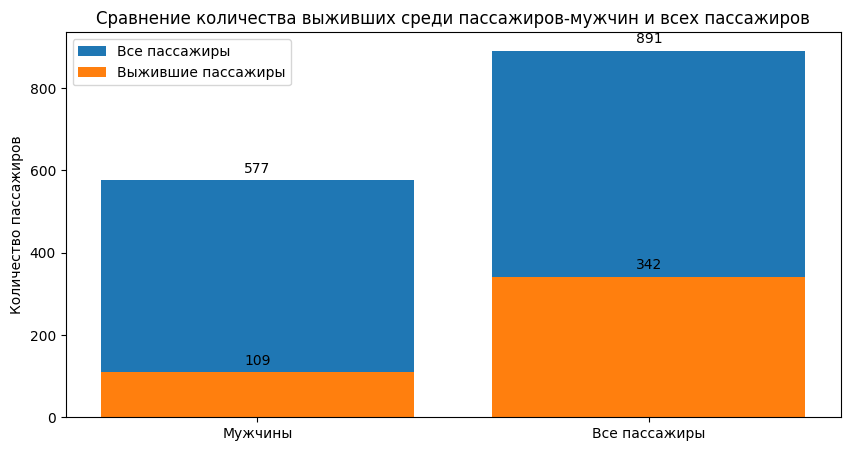

In [20]:
all_males = df.loc[df['Sex'] == 'male'].shape[0]
survived_males = df.loc[df['Sex'] == 'male'].loc[df['Survived'] == 1].shape[0] 

print(f'Выжившие мужчины: {survived_males/all_males*100:.2f}%')
print(f'Выжившие пассажиры всего: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Мужчины', 'Все пассажиры'), (all_males, len(df)), label='Все пассажиры') 
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Мужчины', 'Все пассажиры'), (survived_males, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение количества выживших среди пассажиров-мужчин и всех пассажиров')
ax.set_xticks(range(2))
ax.set_xticklabels(('Мужчины', 'Все пассажиры'))
ax.legend()
plt.show()

Гипотеза подтвердилась – мужчин выжило очень мало. 

Подсчитаем общее количество и количество выживших в зависимости от пола.

Выжившие пассажиры-женщины: 74.20%
Выжившие пассажиры-мужчины: 18.89%


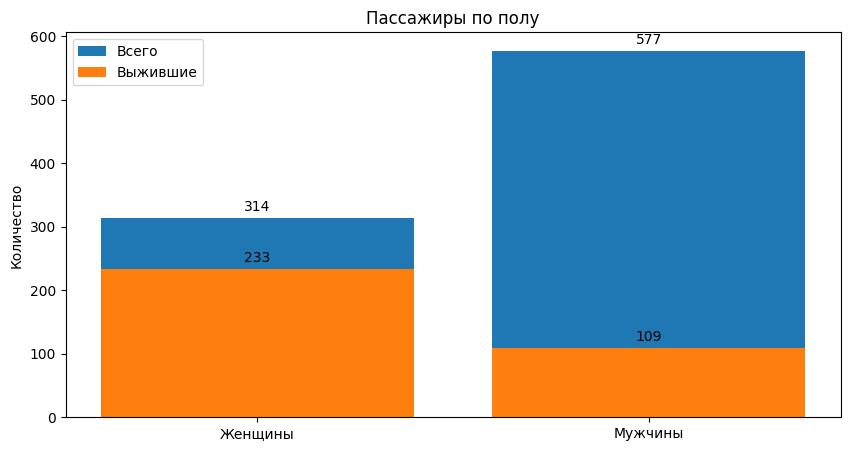

In [21]:
print(f'Выжившие пассажиры-женщины: {survived_females/all_females*100:.2f}%')
print(f'Выжившие пассажиры-мужчины: {survived_males/all_males*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(("Женщины", "Мужчины"), (all_females, all_males), label='Всего')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(("Женщины", "Мужчины"), (survived_females, survived_males), label='Выжившие')
ax.bar_label(survived_bar, padding=3)
ax.set_title('Пассажиры по полу')
ax.set_ylabel('Количество')
ax.set_xticks([0, 1])
ax.set_xticklabels(["Женщины", "Мужчины"])
ax.legend()
plt.show()

### Возраст пассажира

В предыдущих полях мы совершили грубую ошибку, что не проверяли у всех ли заполнены эти поля, но несмотря на это оказалось, что всё-таки у всех. Поэтому для начала проверим у всех ли пассажиров заполнено поле возраста. 

In [22]:
df.loc[pd.isna(df['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr


177 строк – очень большое количество. Исполльзуем нашу колонку статусов, чтобы более-менее правильно дать оценку возраста тем пассажирам, у кого он отсутствует.

In [23]:
status_mean_ages = df.groupby('Status')['Age'].mean().round()
status_mean_ages

Status
Formal    46.0
Master     5.0
Miss      22.0
Mr        32.0
Mrs       36.0
Name: Age, dtype: float64

In [24]:
df['Age'] = df.apply(lambda x: x['Age'] if not pd.isna(x['Age']) else status_mean_ages[x['Status']], axis=1) 
df.loc[pd.isna(df['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status


По крайней мере теперь нет строк с пустым полем возраста. Проверим правильность заполнения на одном из пассажиров, у которых отсутствовал возраст.

In [25]:
df.loc[df['PassengerId'] == 6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,NaN,Q,Mr


Видим, что поле заполнилось правильно. Приступим к работе с ним.

#### 1. Дети выживали чаще

Согласно правилу, которое мы рассмотрели в прошлом разделе – дети тоже имели высокий приоритет, поэтому логично предположить, что они будут выживать чаще.

Детей выжило: 53.85%
Всего выжило: 38.38%


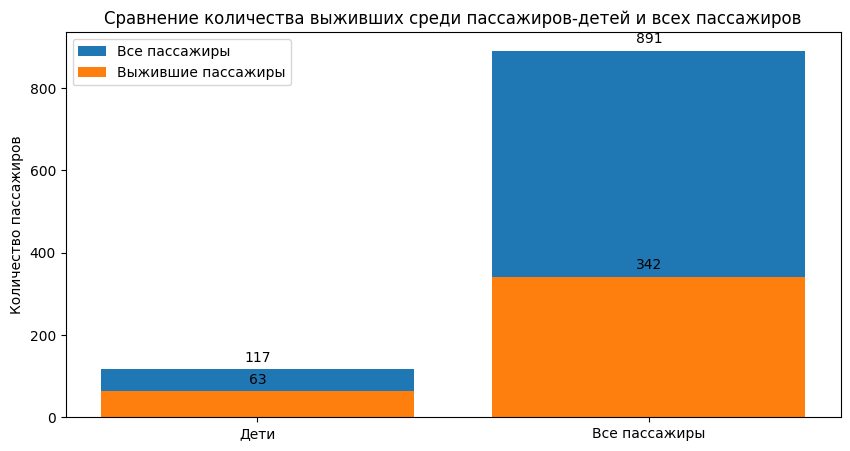

In [26]:
all_children = df.loc[df['Age'] < 18].shape[0]
survived_children = df.loc[df['Age'] < 18].loc[df['Survived'] == 1].shape[0]

print(f'Детей выжило: {survived_children/all_children*100:.2f}%')
print(f'Всего выжило: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Дети', 'Все пассажиры'), (all_children, len(df)), label='Все пассажиры') 
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Дети', 'Все пассажиры'), (survived_children, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение количества выживших среди пассажиров-детей и всех пассажиров')
ax.set_xticks(range(2))
ax.set_xticklabels(('Дети', 'Все пассажиры'))
ax.legend()
plt.show()

Гипотеза подтвердилась – дети действительно выживали чаще.

#### 2. Пожилые пассажиры выживали реже.

Старый организм очень хрупок: даже если им удалось спастись с крушащегося корабля, они могли умереть уже в шлюпках. Да и в целом мышление такое, что пожилые будто уже пожили своё. 

В качестве возраста, с которого начинается старение будем принимать 45 лет, ведь именно в этом возрасте организм начинает необратимо меняться: гормоны вырабатываются не так активно, гибкость мышц теряется и так далее.

Пожилых выжило: 37.07%
Всего выжило: 38.38%


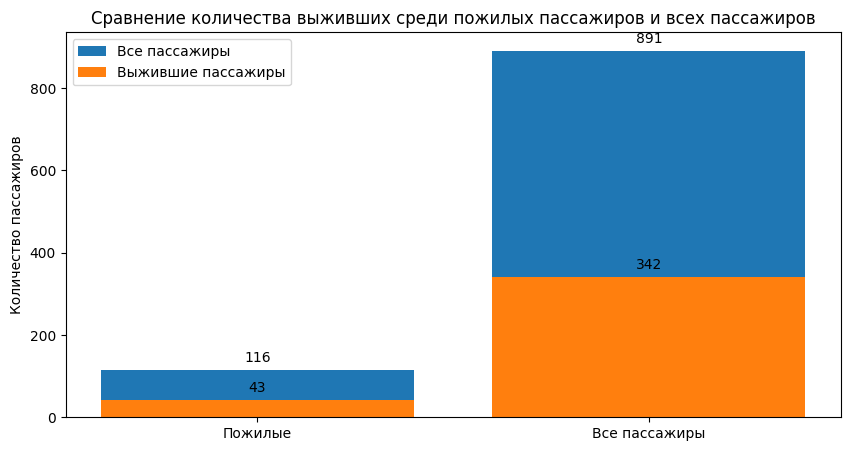

In [27]:
all_elders = df.loc[df['Age'] >= 45].shape[0]
survived_elders = df.loc[df['Age'] >= 45].loc[df['Survived'] == 1].shape[0]

print(f'Пожилых выжило: {survived_elders/all_elders*100:.2f}%')
print(f'Всего выжило: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Пожилые', 'Все пассажиры'), (all_elders, len(df)), label='Все пассажиры') 
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Пожилые', 'Все пассажиры'), (survived_elders, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение количества выживших среди пожилых пассажиров и всех пассажиров')
ax.set_xticks(range(2))
ax.set_xticklabels(('Пожилые', 'Все пассажиры'))
ax.legend()
plt.show()

Гипотеза подтвердилась – пожилые люди действительно выживали реже.

Посмотрим на распределение всех и выживших пассажиров в зависимости от их возраста (дети, средних лет, пожилые).

Выжившие пассажиры-дети: 53.85%
Выжившие пассажиры средних лет: 35.87%
Выжившие пожилые пассажиры: 37.07%


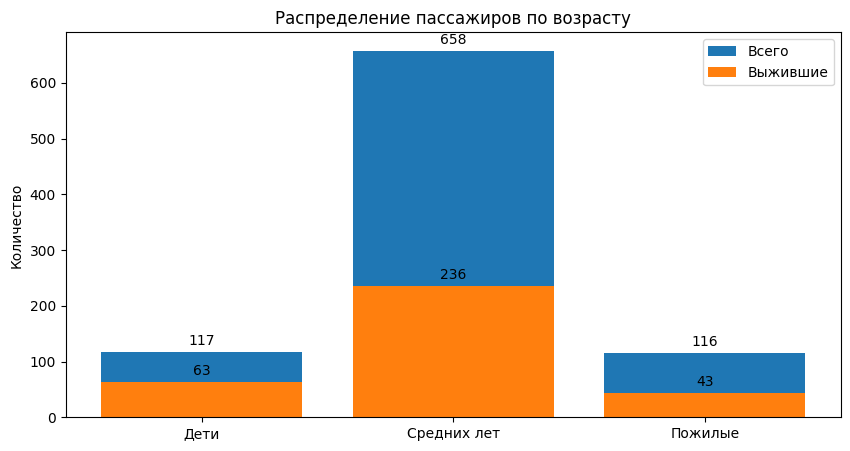

In [28]:
all_average_age = df.loc[(df['Age'] >= 18) & (df['Age'] < 45)].shape[0]
survived_average_age = df.loc[(df['Age'] >= 18) & (df['Age'] < 45) & (df['Survived'] == 1)].shape[0]

print(f'Выжившие пассажиры-дети: {survived_children/all_children*100:.2f}%')
print(f'Выжившие пассажиры средних лет: {survived_average_age/all_average_age*100:.2f}%')
print(f'Выжившие пожилые пассажиры: {survived_elders/all_elders*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Дети', 'Средних лет', 'Пожилые'), (all_children, all_average_age, all_elders), label='Всего')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Дети', 'Средних лет', 'Пожилые'), (survived_children, survived_average_age, survived_elders), label='Выжившие')
ax.bar_label(survived_bar, padding=3)
ax.set_title('Распределение пассажиров по возрасту') 
ax.set_ylabel('Количество')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Дети', 'Средних лет', 'Пожилые'])
ax.legend()
plt.show()

### Родственники

Для проведения анализа по родственникам стоит создать колонку с их числом: там будет содержаться сумма из колонки Parch и SibSp.

In [29]:
df['Relatives'] = df['SibSp'] + df['Parch']
df['Relatives']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Relatives, Length: 891, dtype: int64

In [30]:
df.loc[pd.isna(df['Relatives'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Relatives


Все данные на месте, можем приступать к составлению гипотез

#### 1. Пассажиры с родственниками выживали чаще

Логично предположить, что если у человека есть родственник, то он будет стараться спасти его вместе с собой, также действует и наоборот.

Пассажиров с родственниками выжило: 50.56%
Всего пассажиров выжило: 38.38%


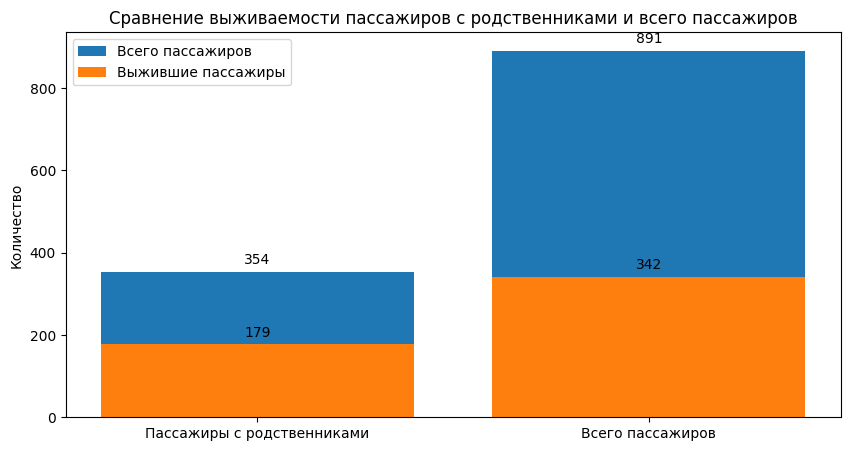

In [31]:
all_relatives = df.loc[df['Relatives'] > 0].shape[0]
survived_relatives = df.loc[df['Relatives'] > 0].loc[df['Survived'] == 1].shape[0]

print(f'Пассажиров с родственниками выжило: {survived_relatives/all_relatives*100:.2f}%')
print(f'Всего пассажиров выжило: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Пассажиры с родственниками', "Всего пассажиров"),(all_relatives, len(df)), label='Всего пассажиров')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Пассажиры с родственниками', "Всего пассажиров"), (survived_relatives, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_title('Сравнение выживаемости пассажиров с родственниками и всего пассажиров')
ax.set_ylabel('Количество')
ax.set_xticks(range(2))
ax.set_xticklabels(['Пассажиры с родственниками', 'Всего пассажиров'])
ax.legend()
plt.show()

Гипотеза подтвердилась – пассажиры с родственниками действительно выживали.

#### 2. Пассажиры в одиночку выживали чаще.

С другой стороны, если пассажир изначально был один, то ему не приходилось ни о ком печься кроме себя, следовательно он думал только о своем спасении и имел неплохие шансы выжить.

Пассажиров без родственников выжило: 30.35%
Всего пассажиров выжило: 38.38%


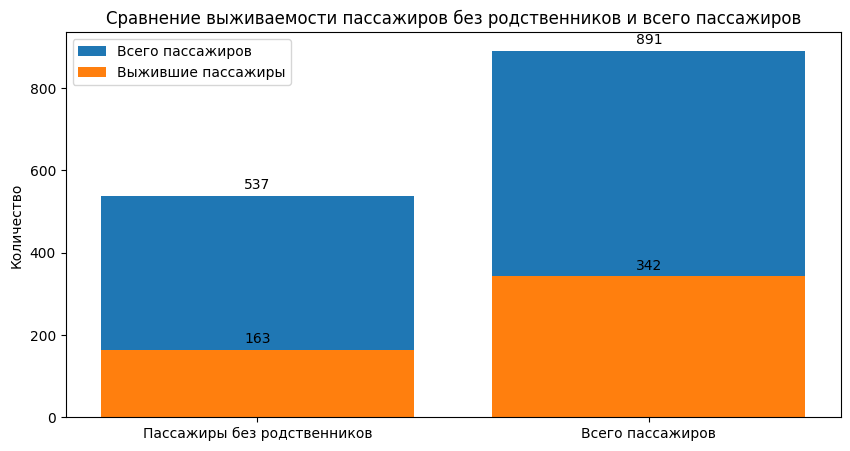

In [32]:
all_no_relatives = df.loc[df['Relatives'] == 0].shape[0]
survived_no_relatives = df.loc[df['Relatives'] == 0].loc[df['Survived'] == 1].shape[0]

print(f'Пассажиров без родственников выжило: {survived_no_relatives/all_no_relatives*100:.2f}%')
print(f'Всего пассажиров выжило: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Пассажиры без родственников', "Всего пассажиров"),(all_no_relatives, len(df)), label='Всего пассажиров')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Пассажиры без родственников', "Всего пассажиров"), (survived_no_relatives, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_title('Сравнение выживаемости пассажиров без родственников и всего пассажиров')
ax.set_ylabel('Количество')
ax.set_xticks(range(2))
ax.set_xticklabels(['Пассажиры без родственников', 'Всего пассажиров'])
ax.legend()
plt.show()

Гипотеза опровергнута – несмотря на то, что таких пассажиров было большинство выживало их к содалению гораздо реже.

Посмотрим на распределение по наличию родственников.

Выжившие пассажиры с родственниками: 50.56%
Выжившие одинокие пассажиры: 30.35%


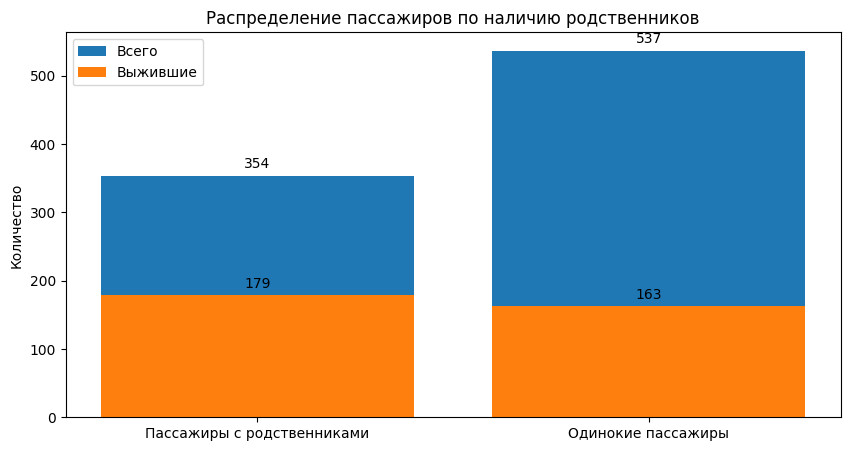

In [33]:
print(f'Выжившие пассажиры с родственниками: {survived_relatives/all_relatives*100:.2f}%')
print(f'Выжившие одинокие пассажиры: {survived_no_relatives/all_no_relatives*100:.2f}%') 

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Пассажиры с родственниками', 'Одинокие пассажиры'), (all_relatives, all_no_relatives), label='Всего')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Пассажиры с родственниками', 'Одинокие пассажиры'), (survived_relatives, survived_no_relatives), label='Выжившие') 
ax.bar_label(survived_bar, padding=3)
ax.set_title('Распределение пассажиров по наличию родственников') 
ax.set_ylabel('Количество')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Пассажиры с родственниками', 'Одинокие пассажиры'])
ax.legend()
plt.show()

### Стоимость билета

In [34]:
df.loc[pd.isna(df['Fare'])] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Relatives


Нечисловых значений не нашлось, может тогда найдутся билеты с нулевой стоимостью?

In [35]:
df.loc[df['Fare'] == 0] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Relatives
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,32.0,0,0,239853,0.0,NaN,S,Mr,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,32.0,0,0,239853,0.0,NaN,S,Mr,0
466,467,0,2,"Campbell, Mr. William",male,32.0,0,0,239853,0.0,NaN,S,Mr,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,32.0,0,0,239854,0.0,NaN,S,Mr,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,32.0,0,0,112052,0.0,NaN,S,Mr,0


Такие данные действительно есть, стоит их заполнить средними значениями.

In [36]:
average_fare = df.loc[df['Fare'] != 0]['Fare'].mean().round(2)
average_fare

np.float64(32.76)

In [37]:
df['Fare'] = df['Fare'].apply(lambda x: x if x > 0 else average_fare)

Посмотрим на распределение стоимости билетов

<Axes: >

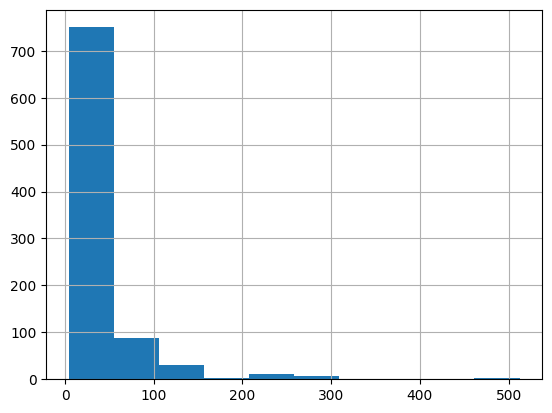

In [38]:
df['Fare'].hist()

Теперь можно приступать к составлению гипотез.

#### 1. Пассажиры с низкой стоимостью билета выживали чаще.

По предыдущей гистограмме можно увидеть, что таких пассажиров было большинство, возможно и выживали они гораздо чаще.

Бедных пассажиро выжило: 31.82%
Всего пассажиров выжило: 38.38%


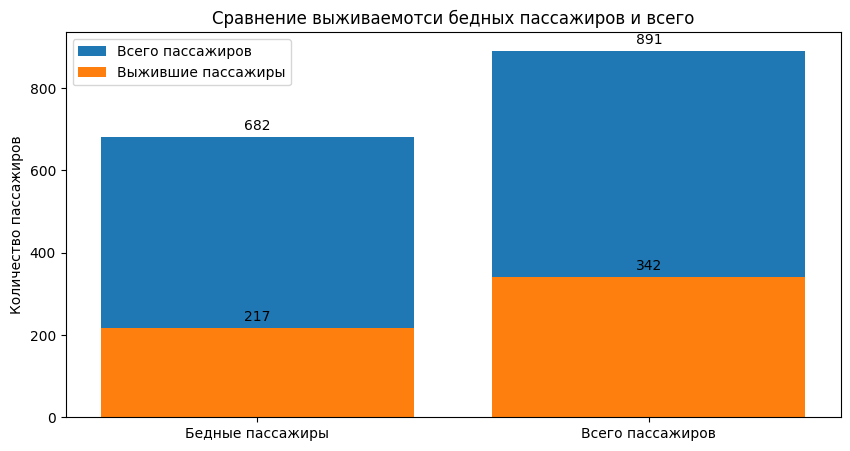

In [39]:
all_poor = df.loc[df['Fare'] <= average_fare].shape[0]
survived_poor = df.loc[df['Fare'] <= average_fare].loc[df['Survived'] == 1].shape[0]

print(f'Бедных пассажиро выжило: {survived_poor/all_poor*100:.2f}%')
print(f'Всего пассажиров выжило: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Бедные пассажиры', "Всего пассажиров"), (all_poor, len(df)), label='Всего пассажиров')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Бедные пассажиры', "Всего пассажиров"), (survived_poor, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение выживаемотси бедных пассажиров и всего')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Бедные пассажиры', 'Всего пассажиров'])
ax.legend()
plt.show()

Что ж, вопреки ожиданиям, гипотеза опровергнута.

#### 2. Богатые пассажиры выживали чаще

Логично предположить, что богатые могут прорываться вперед, подкупая персонал, или они априори имеют ценность, так что их спасали первыми.

Богатых пассажиро выжило: 59.81%
Всего пассажиров выжило: 38.38%


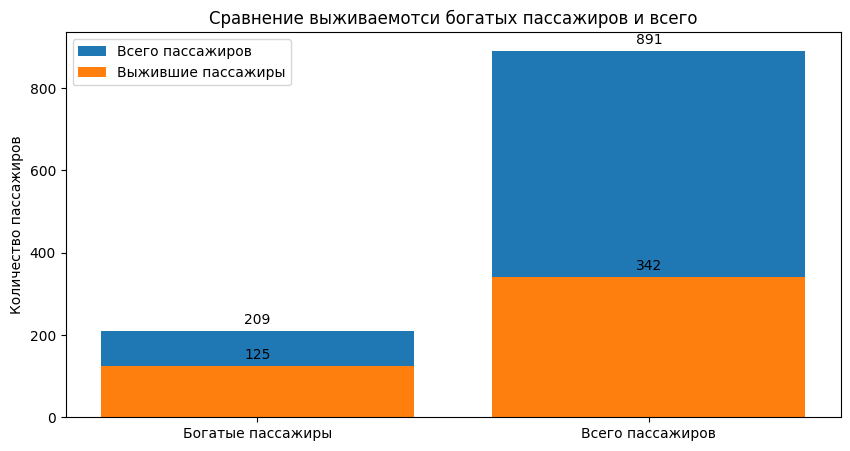

In [40]:
all_rich = df.loc[df['Fare'] > average_fare].shape[0]
survived_rich = df.loc[df['Fare'] > average_fare].loc[df['Survived'] == 1].shape[0]

print(f'Богатых пассажиро выжило: {survived_rich/all_rich*100:.2f}%')
print(f'Всего пассажиров выжило: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Богатые пассажиры', "Всего пассажиров"), (all_rich, len(df)), label='Всего пассажиров')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Богатые пассажиры', "Всего пассажиров"), (survived_rich, all_survived), label='Выжившие пассажиры')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сравнение выживаемотси богатых пассажиров и всего')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Богатые пассажиры', 'Всего пассажиров'])
ax.legend()
plt.show()

И действительно, богатые и вправду выживали чаще – гипотеза подтверждена.

Посмотрим на сравнение выживаемости в зависимости от стоимости билета.

Выжившие богатые пассажиры: 59.81%
Выжившие бедные пассажиры: 31.82%


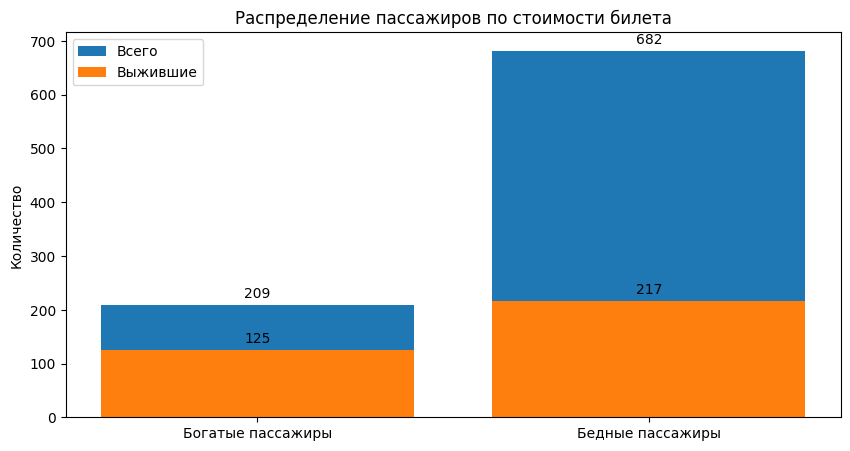

In [41]:
print(f'Выжившие богатые пассажиры: {survived_rich/all_rich*100:.2f}%')
print(f'Выжившие бедные пассажиры: {survived_poor/all_poor*100:.2f}%') 

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Богатые пассажиры', 'Бедные пассажиры'), (all_rich, all_poor), label='Всего')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Богатые пассажиры', 'Бедные пассажиры'), (survived_rich, survived_poor), label='Выжившие') 
ax.bar_label(survived_bar, padding=3)
ax.set_title('Распределение пассажиров по стоимости билета') 
ax.set_ylabel('Количество')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Богатые пассажиры', 'Бедные пассажиры'])
ax.legend()
plt.show()

### Каюта пассажира

Действительно, расположение каюты может сильно повлиять на то, успеет ли пассажир выбраться и сесть в шлюпку или нет.

In [42]:
df.loc[pd.isna(df['Cabin'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,NaN,Q,Mr,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs,5
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Formal,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,3


Хмм, у подавляющего большинства отсутствует каюта. Посмотрим на данные пассажиров, у которых есть каюта, и выясним, можно ли как-то восстановить эти значения.

Естественно каюты все не удастся угадать, но возможно номер палубы нам что-нибудь даст.

In [43]:
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else np.nan)
df.groupby('Deck')[['Fare', 'Age', 'Relatives', 'Survived']].mean()

,Fare,Age,Relatives,Survived
Deck,,,,
A,41.807887,42.266667,0.266667,0.466667
B,114.899806,34.914894,0.936170,0.744681
C,100.151341,35.668136,1.118644,0.593220
D,57.244576,38.727273,0.727273,0.757576
E,46.026694,37.546875,0.625000,0.750000
F,18.696792,21.038462,1.076923,0.615385
G,13.581250,14.750000,1.750000,0.500000
T,35.500000,45.000000,0.000000,0.000000


Ну можно, конечно попробовать распределить их по стоимости билета по палубам и посмотреть, что получится. Но для начала взглянем на распределение выживаемости в зависимости от номера палубы.

<Axes: xlabel='Deck'>

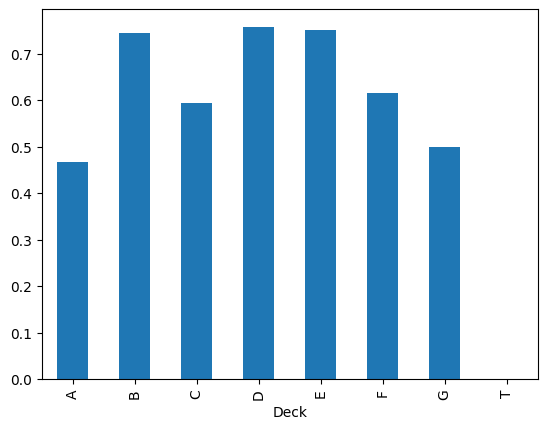

In [44]:
df.groupby(['Deck'])['Survived'].mean().plot(kind='bar')

Интересно получается, почти все, у кого был номер палубы имели высокий шанс на выживание. Но может просто потому что их просто много?

<Axes: xlabel='Deck'>

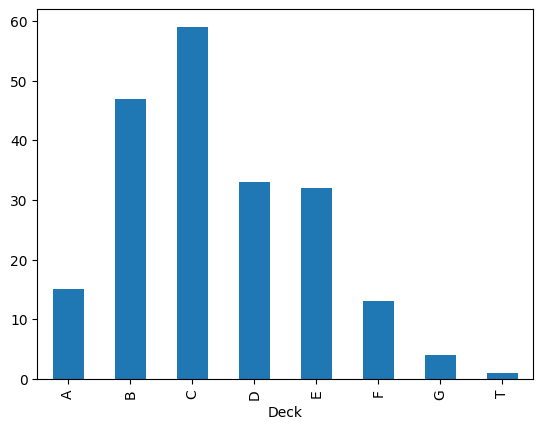

In [45]:
df.groupby(['Deck']).size().plot(kind='bar')

Хмм, можно опровергнуть предположение – палуба C имеет больше всего пассажиров, но уровень выживаемости у него меньше, чем у тех же B, D, E, у которых пассажиров заметно меньеш, но уровень выживаемости выше. Примем это к сведению, а пока перейдем к составлению гипотез.

#### 1. Пассажиры с определенной каютой выживали чаще

Мы заметили, что пассажиры, у которых написан номер каюты имеют высокий уровень выживаемости, будем опираться на это.

Пассажиров с каютами выжило: 66.67%
Всего пассажиров выжило: 38.38%


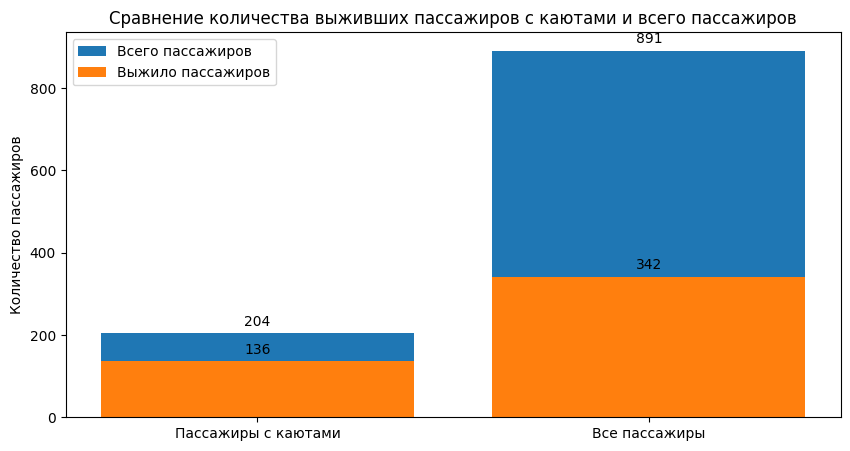

In [46]:
all_cabin = df.loc[pd.notna(df['Cabin'])].shape[0]
survived_cabin = df.loc[pd.notna(df['Cabin'])].loc[df['Survived'] == 1].shape[0]

print(f'Пассажиров с каютами выжило: {survived_cabin/all_cabin*100:.2f}%')
print(f'Всего пассажиров выжило: {all_survived/len(df)*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Пассажиры с каютами', "Все пассажиры"), (all_cabin, len(df)), label='Всего пассажиров')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Пассажиры с каютами', "Все пассажиры"), (survived_cabin, all_survived), label='Выжило пассажиров')
ax.bar_label(survived_bar, padding=3)
ax.set_title('Сравнение количества выживших пассажиров с каютами и всего пассажиров')
ax.set_ylabel('Количество пассажиров')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Пассажиры с каютами', 'Все пассажиры'])
ax.legend()
plt.show()

Гипотеза подтверждена – действительно, пассажиры с каютами выживали чаще.

Посмотрим на распределение по наличию каюты

Пассажиров с каютами выжило: 66.67%
Пассажиров без кают выжило: 29.99%


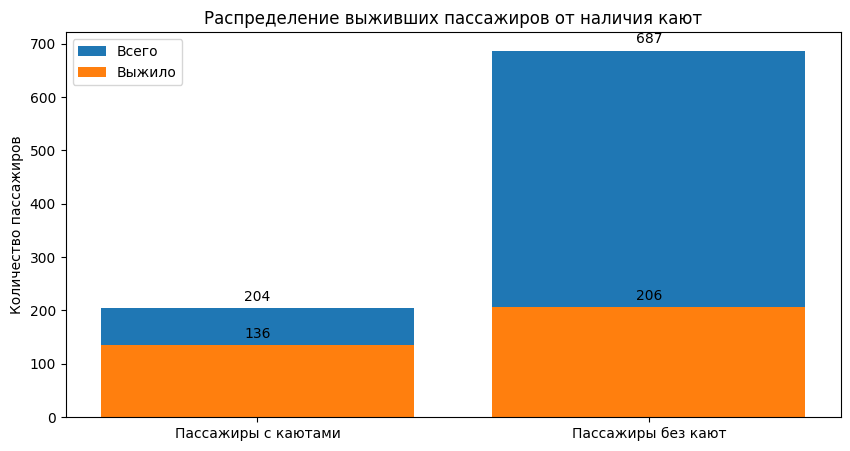

In [47]:
all_no_cabin = df.loc[pd.isna(df['Cabin'])].shape[0]
survived_no_cabin = df.loc[pd.isna(df['Cabin'])].loc[df['Survived'] == 1].shape[0]

print(f'Пассажиров с каютами выжило: {survived_cabin/all_cabin*100:.2f}%')
print(f'Пассажиров без кают выжило: {survived_no_cabin/all_no_cabin*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Пассажиры с каютами',"Пассажиры без кают"),(all_cabin, all_no_cabin), label='Всего')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Пассажиры с каютами',"Пассажиры без кают"),(survived_cabin, survived_no_cabin), label='Выжило')
ax.bar_label(survived_bar, padding=3)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Распределение выживших пассажиров от наличия кают')
ax.legend()
plt.show()

#### 2. Пассажиры с определенной палубы выживали чаще.

Попробуем провести эксперимент – заполним данные о палубе у пассажиров, у которых изначально не было информации о каюте. Будем опираться на среднюю стоимость билета каждой каюты и стоимость билета пассажира.

In [48]:
deck_costs = df.groupby('Deck')[['Fare', 'Age', 'Relatives', 'Survived']].mean().round(2)['Fare'].to_dict()
deck_costs = {v: k for k, v in deck_costs.items()}
deck_costs

{41.81: 'A',
 114.9: 'B',
 100.15: 'C',
 57.24: 'D',
 46.03: 'E',
 18.7: 'F',
 13.58: 'G',
 35.5: 'T'}

Уберем из получившегося словаря палубу T, так как изначально там был всего один человек – вероятно капитан.

In [49]:
deck_costs.pop(35.5)
deck_costs = dict(sorted(deck_costs.items()))
deck_costs

{13.58: 'G',
 18.7: 'F',
 41.81: 'A',
 46.03: 'E',
 57.24: 'D',
 100.15: 'C',
 114.9: 'B'}

In [50]:
df['Deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Deck, Length: 891, dtype: object

In [51]:
def set_deck(row):
    if pd.isna(row['Deck']):
        if row['Fare'] < 18.7:
            return 'G'
        elif row['Fare'] < 41.81:
            return 'F'
        elif row['Fare'] < 46.03:
            return 'A'
        elif row['Fare'] < 57.24:
            return 'E'
        elif row['Fare'] < 100.15:
            return 'D'
        elif row['Fare'] < 114.9:
            return 'C'
        else:
            return 'B'
    return row['Deck']

df['Deck'] = df.apply(set_deck, axis=1)

df['Deck']
        

0      G
1      C
2      G
3      C
4      G
      ..
886    G
887    B
888    F
889    C
890    G
Name: Deck, Length: 891, dtype: object

Попробуем теперь посмотреть на распределение.

<Axes: xlabel='Deck'>

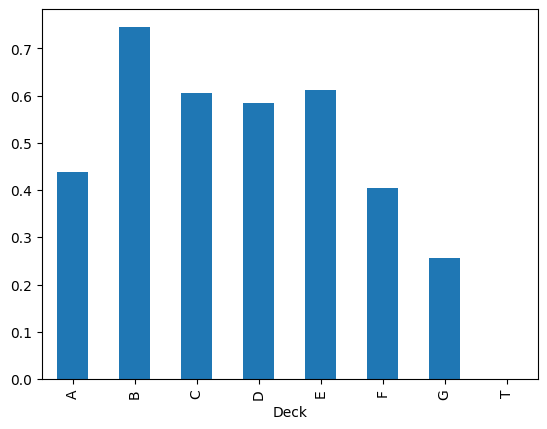

In [52]:
df.groupby(['Deck'])['Survived'].mean().plot(kind='bar')

<Axes: xlabel='Deck'>

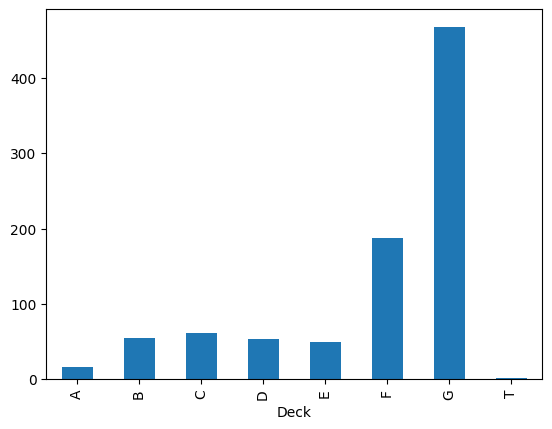

In [53]:
df.groupby(['Deck']).size().plot(kind='bar')

По графикам можно увидеть, что гипотеза в целом подтвердилась, но из этого можно выдвинуть еще одну гипотезу.

#### 3. Пассажиры с определенной группы кают выживали чаще.

Объединим некоторые палубы в две группы – дорогие и дешевые. 

Выжившие из группы дорогих палуб: 63.76%
Выжившие из группы дешевых палуб: 30.21%


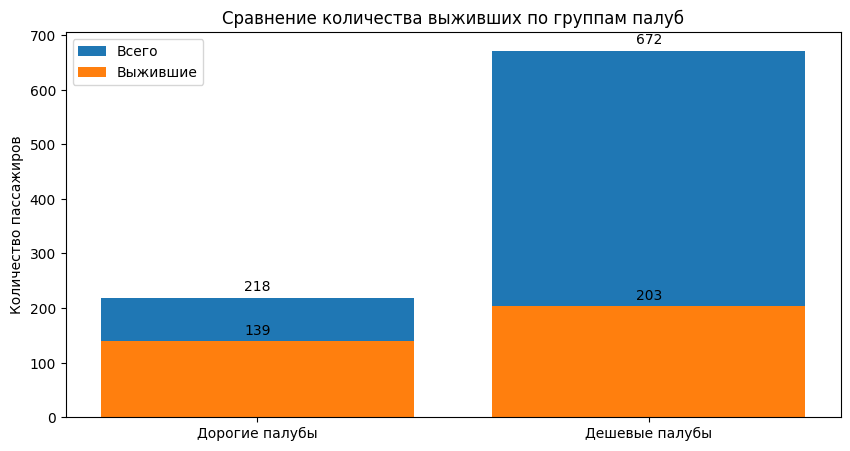

In [54]:
expensive_decks = ['B', 'C', 'D', 'E']
cheap_decks = [i for i in deck_costs.values() if i not in expensive_decks]

all_expensive_decks = df.loc[df['Deck'].isin(expensive_decks)].shape[0]
survived_expensive_decks = df.loc[df['Deck'].isin(expensive_decks)].loc[df['Survived'] == 1].shape[0]

all_cheap_decks = df.loc[df['Deck'].isin(cheap_decks)].shape[0]
survived_cheap_decks = df.loc[df['Deck'].isin(cheap_decks)].loc[df['Survived'] == 1].shape[0]

print(f'Выжившие из группы дорогих палуб: {survived_expensive_decks/all_expensive_decks*100:.2f}%')
print(f'Выжившие из группы дешевых палуб: {survived_cheap_decks/all_cheap_decks*100:.2f}%')

fig, ax = plt.subplots(figsize=(10, 5))
all_bar = ax.bar(('Дорогие палубы', 'Дешевые палубы'), (all_expensive_decks, all_cheap_decks), label='Всего')
ax.bar_label(all_bar, padding=3)
survived_bar = ax.bar(('Дорогие палубы', 'Дешевые палубы'), (survived_expensive_decks, survived_cheap_decks), label='Выжившие')
ax.bar_label(survived_bar, padding=3)
ax.set_title('Сравнение количества выживших по группам палуб') 
ax.set_ylabel('Количество пассажиров')
ax.set_xticks(range(2))
ax.set_xticklabels(('Дорогие палубы', 'Дешевые палубы'))
ax.legend()
plt.show()

Гипотеза подтвердилась – пассажиры из группы дорогих палуб выживали намного чаще чем из дешевых.

Однако стоит отметить, что этот график очень сильно похож на график сравнения количества выживших по стоимости билета – скорее всего это из-за искусственного наполнения данных, опираясь на стоимость билета в определнной палубе.  

## Заключение

На этом можно завершить EDA и research-анализ. Те поля, которые мы не рассматривали с большой вероятностью не имеют ничего общего с тем, выживет пассажир или нет. Это поля номер билета и порт посадки.

Для примера посмотрим на распределение вышивших по портам посадки.

In [55]:
df.loc[pd.isna(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Relatives,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,0,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,0,B


Заполним их наиболее частыми значениями.

In [56]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [57]:
df['Embarked'] = df['Embarked'].apply(lambda x: x if pd.notna(x) else 'S')

In [58]:
all_S = df.loc[df['Embarked'] == 'S'].shape[0]
survived_S = df.loc[df['Embarked'] == 'S'].loc[df['Survived'] == 1].shape[0]

print(all_S)
print(survived_S/all_S*100)

646
33.90092879256966


Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64

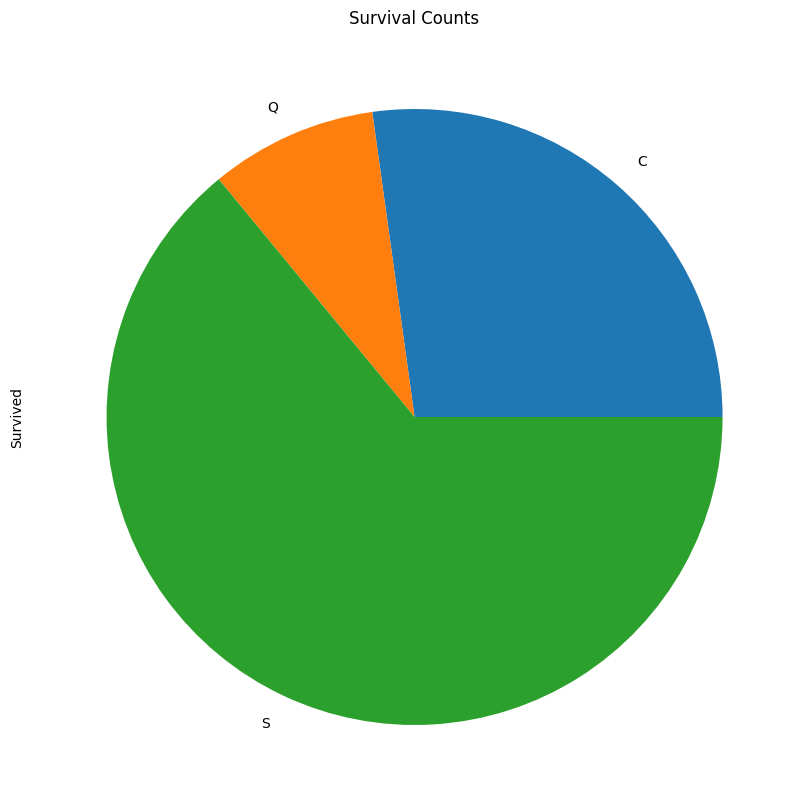

In [59]:
df.loc[df['Survived']==1].groupby('Embarked')['Survived'].size().plot(kind='pie', figsize=(10,10), title='Survival Counts')
df.loc[df['Survived']==1].groupby('Embarked')['Survived'].size()

Embarked
C    168
Q     77
S    646
dtype: int64

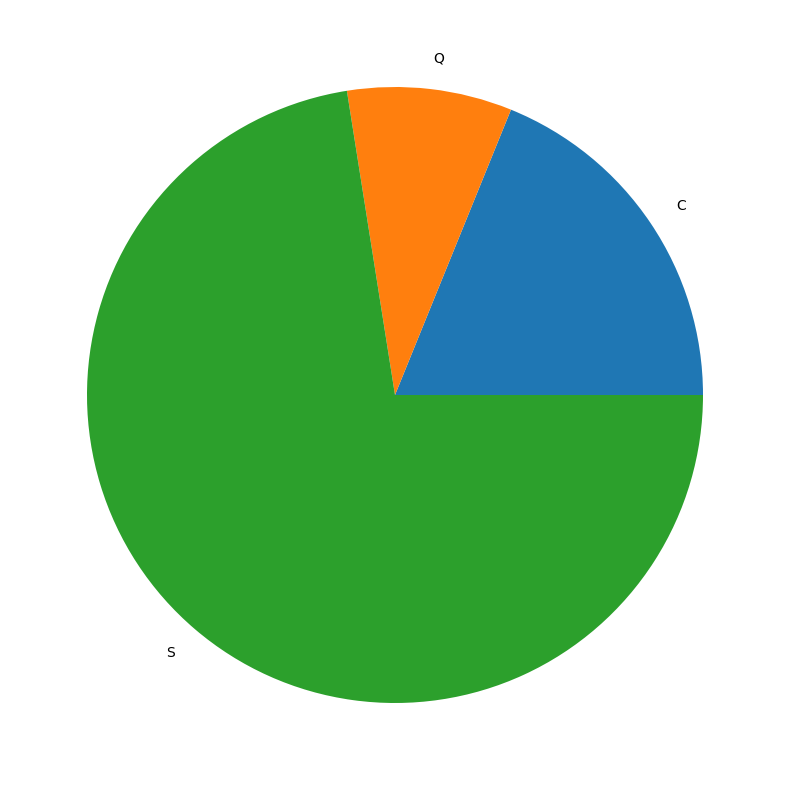

In [60]:
df.groupby('Embarked').size().plot(kind='pie', figsize=(10,10))
df.groupby('Embarked').size()

Видно, что распределение всех пассажиров и выживших пассажиров по портам отправления практиески одинаковое. 

## Выводы

1. Пассажиры с классом 1 имеют более высокую вероятность выжить, чем пассажиры остальных классов.
2. Пассажиры со статусами Mrs, Miss, Master имеют более высокую вероятность выжить.
3. Женщины имеют более высокую вероятность выжить чем мужчины.
4. Дети имеют более высокую вероятность выжить чем пожилые люди и пассажиры среднего возраста.
5. Пассажиры с родственниками выживали чаще чем пассажиры без родственников.
6. Пассажиры, у которых билет стоил выше средней стоимости, выживали чаще чем те, у которых он стоил дешевле.
7. Пассажиры, у которых определен номер каюты, выживали чаще чем те, у которых он не определен.

# Feature Engineering  


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

Создадим копию датафрейма для дальнейшей обработки

In [62]:
df_fe = df.copy()

Далее выполним извлечение титула пассажира из имени и сгруппируем их в категориальные статусы согласно проведенному анализу на предыдущем этапе.  


In [63]:
status_mapping = {
    'Mr': ['Mr'],
    'Master': ['Master'],
    'Miss': ['Miss', 'Mlle', 'Ms', 'Mme'],
    'Mrs': ['Mrs'],
    'Formal': ['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Lady', 'the Countess', 'Don', 'Sir', 'Jonkheer']
}
reverse_mapping = {status: group for group, statuses in status_mapping.items() for status in statuses}
df_fe['Status'] = df_fe['Name'].str.extract(', ([a-zA-Z]+)\.').replace(reverse_mapping)

Заполним пропуски в возрасте средним значением по каждому статусу, чтобы обеспечить более разумную оценку возраста, чем просто общее среднее. Также разделим пассажиров на несколько категорий - дети, пассажири средних лет и пожилые.


In [64]:
status_mean_ages = df_fe.groupby('Status')['Age'].mean().round()
df_fe['Age'] = df_fe.apply(lambda x: x['Age'] if not pd.isna(x['Age']) else status_mean_ages.get(x['Status'], df_fe['Age'].mean()), axis=1)
df_fe['AgeGroup'] = pd.cut(df_fe['Age'], bins=[0, 18, 45, 100], labels=['Child', 'Adult', 'Elderly'])

Объединим количество братьев-сестер и родителей-детей для оценки размера семьи.
Исходя из этого выявим новые группы - одиночки, небольшие семьи, большие семьи.


In [65]:
df_fe['RelativesGroup'] = pd.cut(df_fe['SibSp'] + df_fe['Parch'], bins=[-1, 0, 4, 10], labels=['None', 'Few', 'Many'])

Разделеним пассажиров по стоимости билета на бедных и богатых, т.к. это может быть связано с классом обслуживания и шансами на спасение


In [66]:
mean_fare = df_fe['Fare'].mean()
df_fe['FareGroup'] = np.where(df_fe['Fare'] < mean_fare, 'Poor', 'Rich')

Также логарифмируем Fare, чтобы сгладить выбросы и сделать распределение более нормальным


In [67]:
df_fe['Fare_log'] = np.log1p(df_fe['Fare'])

Аналогично этапу EDA и ресерч-анализу разделим палубы на основе стоимости билета, если она изначально не указана

In [68]:
def set_deck(row):
    if pd.isna(row['Deck']):
        if row['Fare'] < 18.7: return 'G'
        elif row['Fare'] < 41.81: return 'F'
        elif row['Fare'] < 46.03: return 'A'
        elif row['Fare'] < 57.24: return 'E'
        elif row['Fare'] < 100.15: return 'D'
        elif row['Fare'] < 114.9: return 'C'
        else: return 'B'
    return row['Deck']

df_fe['Deck'] = df_fe.apply(set_deck, axis=1)

Объединим палубы в Expensive и Cheap

In [69]:
expensive_decks = ['B', 'C', 'D', 'E']
df_fe['DeckGroup'] = np.where(df_fe['Deck'].isin(expensive_decks), 'Expensive', 'Cheap')

Создадим проверку на наличие каюты

In [70]:
df_fe['HasCabin'] = df_fe['Cabin'].notna().astype(int)

Заполним пустые значения Embarked самым частым значением - S.


In [71]:
df_fe['Embarked'] = df_fe['Embarked'].fillna('S')

Преобразуем категориальные признаки в числовые с помощью get_dummies, чтобы модели ML могли работать с такими переменными.


In [72]:
cat_cols = ['Status', 'AgeGroup', 'RelativesGroup', 'FareGroup', 'DeckGroup', 'Sex', 'Embarked']
df_fe = pd.get_dummies(df_fe, columns=cat_cols, drop_first=True)

In [73]:
print(df_fe.dtypes)

PassengerId              int64
Survived                 int64
Pclass                   int64
Name                    object
Age                    float64
SibSp                    int64
Parch                    int64
Ticket                  object
Fare                   float64
Cabin                   object
Relatives                int64
Deck                    object
Fare_log               float64
HasCabin                 int64
Status_Master             bool
Status_Miss               bool
Status_Mr                 bool
Status_Mrs                bool
AgeGroup_Adult            bool
AgeGroup_Elderly          bool
RelativesGroup_Few        bool
RelativesGroup_Many       bool
FareGroup_Rich            bool
DeckGroup_Expensive       bool
Sex_male                  bool
Embarked_Q                bool
Embarked_S                bool
dtype: object


Можем увидеть, что некоторые признаки имеют тип object. Поэтому выполним корреляцию только по числовым типам. Преобразовывать такие типы не будем, поскольку такое преобразование повлияет на точность корреляции и дальнейшего результата модели.

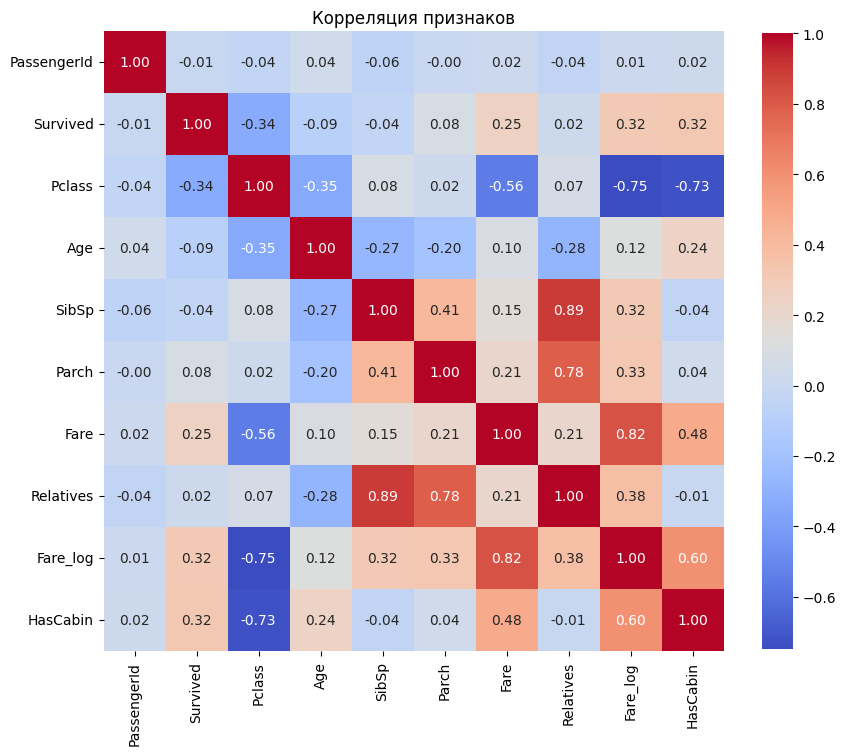

In [74]:
corr_matrix = df_fe.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

plt.title('Корреляция признаков')
plt.show()

Наибольшая положительная корреляция наблюдается между признаками:

Fare и Fare_log - 0.82, что ожидаемо, так как Fare_log является преобразованной версией Fare

SibSp и Relatives - 0.89, а также Parch и Relatives - 0.78, что указывает на тесную связь между количеством родственников на борту

Наибольшая отрицательная корреляция:

Pclass и Fare_log - -0.75, а также Pclass и HasCabin - -0.73, что подтверждает, что пассажиры более высокого класса платили больше и чаще имели каюту

Признак Survived имеет умеренную положительную корреляцию с Fare_log - 0.32 и HasCabin - 0.32, что может указывать на то, что пассажиры с более дорогими билетами и наличием каюты чаще выживали

Удалим признаки, которые никак не влияют на выживаение пассажира

In [75]:
low_corr = corr_matrix[abs(corr_matrix['Survived']) < 0.05].index
df_fe = df_fe.drop(low_corr, axis=1)

Подготавим данные для обучения. Разделим их на признаки X и признак Survived - y

In [76]:
X = df_fe.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'], errors='ignore')
y = df_fe['Survived']
X_encoded = pd.get_dummies(X, drop_first=True)

Применим StandardScaler для нормализации данных и разобьем их на тренировочную и тестовую выборки


In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Обучим модель случайного леса и оценим ее качество - precision, recall, f1-score показывают, насколько хорошо модель предсказывает выживших и погибших. Также используем ROC AUC для оценки вероятности класса выживших


In [78]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"\nROC-AUC: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


ROC-AUC: 0.9054


Модель показывает хорошее качество предсказаний с точностью 0.85.

Для класса 0 (не выжившие) метрики precision (0.87) и recall (0.88) выше, чем для класса 1 (выжившие), где precision и recall составляют 0.82 и 0.81 соответственно. Это может указывать на небольшой дисбаланс в данных или на то, что модель лучше предсказывает негативный исход

Проанализируем важность признаков - Feature Inportances

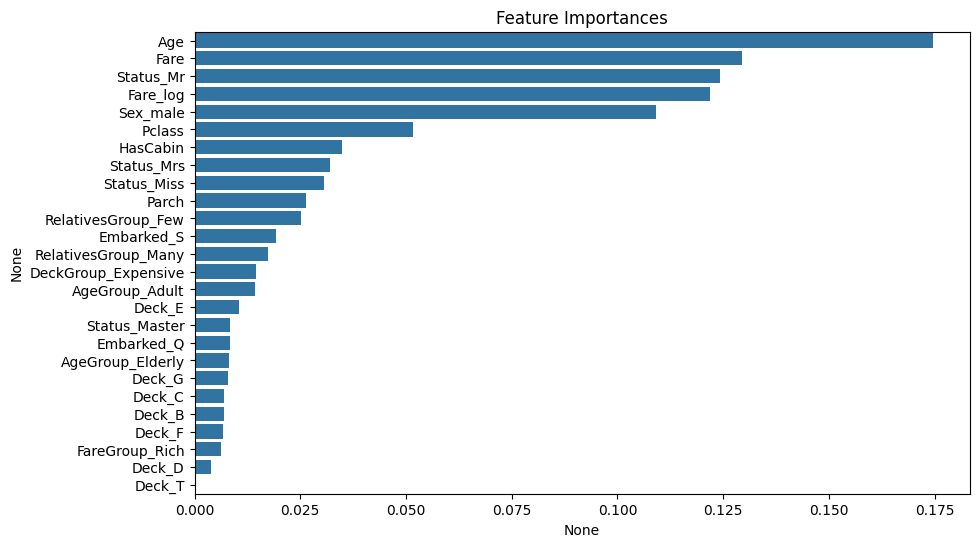

In [79]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

Наиболее значимыми признаками для модели являются:

Age и Fare - можно посчитать логичным, так как возраст и стоимость билета могут сильно влиять на выживаемость

Status_Mr, Sex_male, Pclass - социальный статус и пол также играют важную роль, что соответствует историческим данным о приоритете спасения женщин и пассажиров высшего класса

Fare_log и HasCabin подтверждают важность финансового статуса пассажира

Менее значимые признаки, такие как Deck и Embarked, имеют небольшую важность

## Выводы

Feature Engineering позволил выявить такие важные признаки, как: статус, возрастные группы, родственников и палубу, от которых зависела выживаемость.

Модель Random Forest оказалась эффективной для предсказания выживаемости с точностью 0.85.

Ключевыми признаками являются Age, Fare (Fare_log), Status_Mr, Sex_male, PClass.

Признаки с низкой корреляцией были удалены, что улучшило качество модели.

Модель успешно различает выживших и невыживших, особенно по полу, возрасту и социальному статусу.

# Эксперименты с моделями машинного обучения на данных Titanic

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

Напишем функцию для удобного вывода результатов

In [81]:
def print_results(y_test, y_pred, y_pred_proba, model_name):
    print(model_name)
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

В предыдущей части работы мы использовали модель Random Forest. Продублируем полученные значения для дальнейшего сравнения

In [82]:
print_results(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

ROC AUC: 0.9054


## Линейная модель: Логистическая регрессия

In [83]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_proba = lr.predict_proba(X_test)[:, 1]

print_results(y_test, lr_pred, lr_pred_proba, "Logistic Regression")

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       105
           1       0.78      0.81      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC AUC: 0.8856


## Дерево решений

In [84]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)[:, 1]

print_results(y_test, dt_pred, dt_pred_proba, "Decision Tree")

Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

ROC AUC: 0.8448


## Градиентный бустинг

Используем модификацию XGBoost

In [85]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)[:, 1]

print_results(y_test, xgb_pred, xgb_pred_proba, "XGBoost")

XGBoost
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC AUC: 0.8879


## Нейронная сеть

In [86]:
nn = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_pred_proba = nn.predict_proba(X_test)[:, 1]

print_results(y_test, nn_pred, nn_pred_proba, "Neural Network")

Neural Network
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.75      0.84      0.79        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC AUC: 0.8458


## K-ближайших соседей

In [87]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)[:, 1]

print_results(y_test, knn_pred, knn_pred_proba, "K-Nearest Neighbors")

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC AUC: 0.8555


По результатам оценки шести моделей можем увидеть, что наилучший имеет Random Forest - ROG AUC: 0.9054.   
Выполним кросс-валидацию для данной модели

In [88]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=0)

y_pred_cv = cross_val_predict(rf, X_scaled, y, cv=cv, method='predict')
y_pred_proba_cv = cross_val_predict(rf, X_scaled, y, cv=cv, method='predict_proba')[:, 1]
print("Результаты кросс-валидации")
print_results(y, y_pred_cv, y_pred_proba_cv, "Random Forest")

Результаты кросс-валидации
Random Forest
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       549
           1       0.77      0.73      0.75       342

    accuracy                           0.81       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891

ROC AUC: 0.8601


# Итоговый вывод по работе

В ходе данного соревнования над задачей по предсказанию выживаемости пассажиров Титаника были проанализированы различные аспекты данных и применены методы машинного обучения. 

С помощью проверки различных гипотез относительно определенных полей датасета, мы смогли выявить ключевые факторы, влияющие на выживаемость, такие как пол, возраст, наличие каюты, количество родственников и другие, и просмотреть их на графиках, что дало наиболее четкую оценку действительного влияния на целевую переменную.

Также была проделана значительная работа по Feature Engineering, что позволило создать новые переменные, способные улучшить предсказательную способность модели. Мы исследовали корреляцию этих новых колонок с целевой переменной, что помогло выявить наиболее информативные признаки. Кроме того, провели оценку важности признаков и разработали простую модель, чтобы понять, какие факторы вносят наибольший вклад в предсказание выживаемости пассажиров, и получить базовые результаты для понимания общих принципов работы с данными.

Используя алгоритмы, такие как логистическая регрессия, случайные леса, градиентный бустинг и другие, мы достигли значительных результатов в предсказании выживаемости. Наилучшие результаты были показаны при применении случайного леса, что подтвердило его эффективность для данной задачи.

Кроме того, в процессе работы мы столкнулись с необходимостью предобработки данных, что включало заполнение пропусков, кодирование категориальных переменных и нормализацию. Это подчеркивает важность качественной подготовки данных для достижения точных и надежных моделей.

Таким образом, данное соревнование позволило глубже понять процесс анализа данных, важность предобработки и возможности использования различных алгоритмов для решения практических задач в сфере анализа данных и машинного обучения.